In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

## Load SGM data and label_10 train

In [2]:
x_train = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/SGM/data.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/SGM/label_10.npy')

x_test = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/test/data.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/test/label_10.npy')

x_val = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/val/data.npy')
y_val = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/val/label_10.npy')

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape)

(1778030, 12) (1778030, 1) (508012, 12) (508012,) (254005, 12) (254005,)


In [3]:
x_train = np.expand_dims(x_train,2)
x_test = np.expand_dims(x_test,2)
x_val = np.expand_dims(x_val,2)
# label one-hot
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [4]:
y_train.shape

(1778030, 10)

# Train model

In [5]:
from keras.layers import Conv1D,MaxPooling1D,Dense,Dropout,Input,Flatten,GlobalAveragePooling1D
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model
from keras.optimizers import Nadam
from keras import initializers
from keras import regularizers
np.random.seed(4)
import pickle
import math
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
n_obs,feature, depth = x_train.shape
batch_size = 256
def build_model():
    input_singal = Input(shape=(feature,depth))
    x = Conv1D(32,3,activation='relu',padding='same',kernel_initializer='he_uniform')(input_singal)
    x = Conv1D(32,3,activation='relu',padding='same',kernel_initializer='he_uniform')(x)
    x = MaxPooling1D(pool_size=2,strides=2)(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)

    x = Conv1D(64,3,activation='relu',padding='same',kernel_initializer='he_uniform')(x)
    x = Conv1D(64,3,activation='relu',padding='same',kernel_initializer='he_uniform')(x)
    x = MaxPooling1D(pool_size=2,strides=2)(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)

    x = Flatten()(x)
    x = Dense(32,activation='relu')(x)
    x = Dense(10,activation='softmax')(x)   #UNSW-NB15 is 2 and 10,CICIDS2017 is 15
    model = Model(inputs=input_singal,outputs=x)

    return model

In [ ]:
model = build_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 12, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 6, 32)             0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 6, 32)             0         
                                                                 
 batch_normalization (Batch  (None, 6, 32)             128       
 Normalization)                                              

In [ ]:
import keras
import time
time_start = time.time()

reduce_lr = keras.callbacks.ReduceLROnPlateau(moniter='val_loss',
                                              factor=0.1,
                                              patience=10)
nadam = tf.keras.optimizers.legacy.Nadam(lr=0.008, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss = "categorical_crossentropy",optimizer = "nadam", metrics = ["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=batch_size,
                    verbose=2,
                    validation_data=(x_val, y_val),
                    callbacks=[reduce_lr])
time_end = time.time()
train_time = time_end - time_start
print("train_time:",train_time)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/nadam.py:89: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Train on 1778030 samples, validate on 254005 samples
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1778030/1778030 - 55s - loss: 0.9453 - acc: 0.6348 - val_loss: 0.1366 - val_acc: 0.9614 - lr: 0.0010 - 55s/epoch - 31us/sample
Epoch 2/100
1778030/1778030 - 46s - loss: 0.8356 - acc: 0.6712 - val_loss: 0.1303 - val_acc: 0.9613 - lr: 0.0010 - 46s/epoch - 26us/sample
Epoch 3/100
1778030/1778030 - 47s - loss: 0.8111 - acc: 0.6797 - val_loss: 0.1284 - val_acc: 0.9609 - lr: 0.0010 - 47s/epoch - 26us/sample
Epoch 4/100
1778030/1778030 - 48s - loss: 0.7972 - acc: 0.6841 - val_loss: 0.1270 - val_acc: 0.9613 - lr: 0.0010 - 48s/epoch - 27us/sample
Epoch 5/100
1778030/1778030 - 45s - loss: 0.7874 - acc: 0.6875 - val_loss: 0.1284 - val_acc: 0.9639 - lr: 0.0010 - 45s/epoch - 25us/sample
Epoch 6/100
1778030/1778030 - 47s - loss: 0.7803 - acc: 0.6891 - val_loss: 0.1254 - val_acc: 0.9633 - lr: 0.0010 - 47s/epoch - 27us/sample
Epoch 7/100
1778030/1778030 - 47s - loss: 0.7750 - acc: 0.6914 - val_loss: 0.1221 - val_acc: 0.9628 - lr: 0.0010 - 47s/epoch - 26us/sample
Epoch 8/100
1778030/1778030 - 47s - los

In [9]:
scores = model.evaluate(x_test, y_test)
print("test_loss = ", scores[0],"test_accuracy = ", scores[1])

15876/15876 [==============================] - 51s 3ms/step - loss: 0.1219 - accuracy: 0.9638
test_loss =  0.12186829745769501 test_accuracy =  0.9638335108757019


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/classification_decision/CNN_SGM_10(2ci).h5') #save model

NotImplementedError: numpy() is only available when eager execution is enabled.

# Load model from file

In [8]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/classification_decision/CNN_SGM_10(2ci).h5')
# model = tf.keras.models.load_model('my_model')  # For TensorFlow SavedModel format

# Summary of the loaded model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 12, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 6, 32)             0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 6, 32)             0         
                                                                 
 batch_normalization (Batch  (None, 6, 32)             128       
 Normalization)                                              

# Test model

In [10]:
import time
time_start = time.time()

y_pred_onehot = model.predict(x_test)  #It returns the probability distribution on the category
y_pred_label=np.argmax(y_pred_onehot,axis=1)#The category with the highest probability is the prediction category

time_end = time.time()
test_time = time_end - time_start
print("test_time:",test_time)

# np.savetxt("E:/IDS/cicdata/GMM+SMOTE_77/2ci/CNN_pred_15.txt",y_pred_label)

15876/15876 [==============================] - 35s 2ms/step
test_time: 82.16958093643188


In [11]:
y_true_onehot = y_test
y_true_label = np.argmax(y_true_onehot,axis=1)
# np.savetxt("E:/IDS/cicdata/GMM+SMOTE_77/2ci/CNN_true_15.txt",y_true_label)

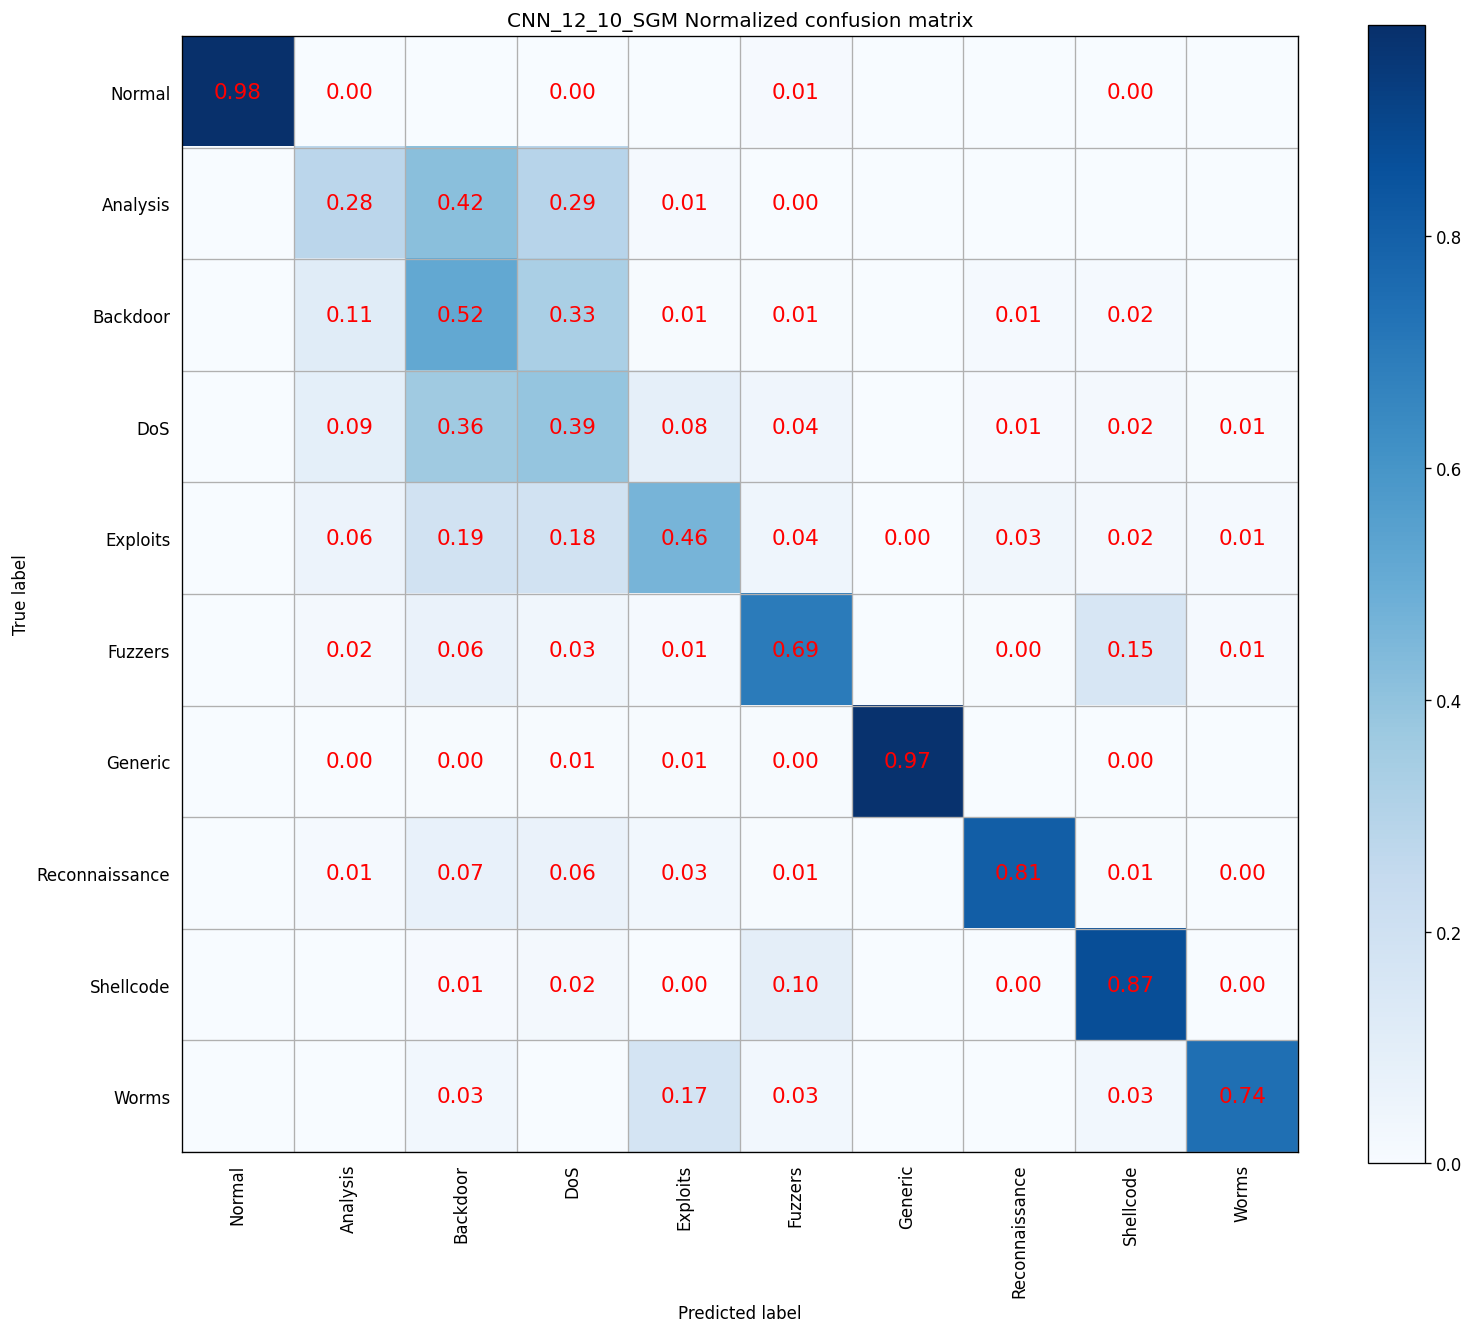

In [13]:
# -*-coding:utf-8-*-
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms']  #class name

y_true = y_true_label
y_pred  = y_pred_label

tick_marks = np.array(range(len(labels))) + 0.5

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15, 13), dpi=120)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c > 0.001:
        plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=13, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='CNN_12_10_SGM Normalized confusion matrix')
#plt.savefig('/home/hll/IDS/alldata/cm/confusion_matrix.png', format='png')
plt.show()

In [14]:
print(cm)  #Confusion matrix

[[435953    647     31   1359    324   3840      4     31   1141    425]
 [     0    149    223    154      7      2      0      0      0      0]
 [     0     52    241    154      3      3      0      6      7      0]
 [     0    294   1181   1271    276    126      1     28     71     21]
 [     2    502   1659   1645   4106    380     16    274    197    125]
 [     1     90    314    165     69   3369      0     24    749     68]
 [     2     51    186    290    298    188  42001      5     52     24]
 [     0     40    199    174     79     18      2   2260     18      7]
 [     0      0      3      5      1     29      0      1    263      1]
 [     0      0      1      0      6      1      0      0      1     26]]


## multi-class evaluation indicators

In [15]:
from sklearn import metrics
from sklearn.metrics import classification_report

target_names = ['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms']
print(classification_report(y_true,y_pred,target_names=target_names))

                precision    recall  f1-score   support

        Normal       1.00      0.98      0.99    443755
      Analysis       0.08      0.28      0.13       535
      Backdoor       0.06      0.52      0.11       466
           DoS       0.24      0.39      0.30      3269
      Exploits       0.79      0.46      0.58      8906
       Fuzzers       0.42      0.69      0.53      4849
       Generic       1.00      0.97      0.99     43097
Reconnaissance       0.86      0.81      0.83      2797
     Shellcode       0.11      0.87      0.19       303
         Worms       0.04      0.74      0.07        35

      accuracy                           0.96    508012
     macro avg       0.46      0.67      0.47    508012
  weighted avg       0.98      0.96      0.97    508012



In [16]:
acc = metrics.accuracy_score(y_true,y_pred)
f1 = metrics.f1_score(y_true, y_pred,average='weighted')
pre = metrics.precision_score(y_true, y_pred, labels=None, pos_label=1, average='weighted')  #DR
recall = metrics.recall_score(y_true, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None)

print("acc:",acc)
print("pre:",pre)
print("DR=recall:",recall)
print("f1:",f1)

acc: 0.9638335314913821
pre: 0.9827654901750371
DR=recall: 0.9638335314913821
f1: 0.9715933226755685
